In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
# Load both files
df_parquet = pd.read_csv("lightcurve_features_26_negative.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")

In [4]:
neg_files = sorted(glob.glob("negative_subset_group*.parquet"))

In [5]:
print(neg_files)

['negative_subset_group_1.parquet', 'negative_subset_group_10.parquet', 'negative_subset_group_11.parquet', 'negative_subset_group_12.parquet', 'negative_subset_group_13.parquet', 'negative_subset_group_14_noise.parquet', 'negative_subset_group_2.parquet', 'negative_subset_group_3.parquet', 'negative_subset_group_4.parquet', 'negative_subset_group_5.parquet', 'negative_subset_group_6.parquet', 'negative_subset_group_7.parquet', 'negative_subset_group_8.parquet', 'negative_subset_group_9.parquet']


In [6]:
for f in neg_files:
    print("\nChecking:", f)
    df = pd.read_parquet(f)

    # Replace 'column_name' with the correct column
    non_ztf = df[~df['object'].str.startswith('ZTF', na=False)]

    if len(non_ztf) > 0:
        print("Elements NOT starting with ZTF:")
        print(non_ztf)
    else:
        print("All elements start with ZTF")


Checking: negative_subset_group_1.parquet
All elements start with ZTF

Checking: negative_subset_group_10.parquet
All elements start with ZTF

Checking: negative_subset_group_11.parquet
All elements start with ZTF

Checking: negative_subset_group_12.parquet
All elements start with ZTF

Checking: negative_subset_group_13.parquet
All elements start with ZTF

Checking: negative_subset_group_14_noise.parquet
All elements start with ZTF

Checking: negative_subset_group_2.parquet
All elements start with ZTF

Checking: negative_subset_group_3.parquet
All elements start with ZTF

Checking: negative_subset_group_4.parquet
All elements start with ZTF

Checking: negative_subset_group_5.parquet
All elements start with ZTF

Checking: negative_subset_group_6.parquet
All elements start with ZTF

Checking: negative_subset_group_7.parquet
All elements start with ZTF

Checking: negative_subset_group_8.parquet
All elements start with ZTF

Checking: negative_subset_group_9.parquet
All elements start with

In [7]:
sampled_list = []
seen_objects = set()     # To track unique objects across all groups

for f in neg_files:
    df = pd.read_parquet(f)

    # Remove any objects already selected before sampling
    df_unique = df[~df["object"].isin(seen_objects)]

    # Sample up to 10 available unique objects from this group
    n = min(10, len(df_unique))
    sampled = df_unique.sample(n, random_state=42)

    # Add to our list
    sampled_list.append(sampled)

    # Update the set of seen objects
    seen_objects.update(sampled["object"].tolist())

# Combine all 14 groups' samples
final_140 = pd.concat(sampled_list, ignore_index=True)

print(final_140)
print("Total unique sampled objects:", final_140["object"].nunique())

           object       mean  weighted_mean  standard_deviation     median  \
0    ZTF18aaxyuxl  16.354319      16.333272            0.270252  16.427167   
1    ZTF18aaxaoau  15.720052      15.713978            0.163797  15.779869   
2    ZTF18abjwfce  15.530978      15.527124            0.209941  15.516777   
3    ZTF18acvwwcb  15.765434      15.764291            0.085287  15.755574   
4    ZTF18abajgal  15.954566      15.949912            0.133589  15.904966   
..            ...        ...            ...                 ...        ...   
135  ZTF18abebodx  18.723952      17.634027            1.031779  19.133232   
136  ZTF18aaxaoys  15.540269      15.529291            0.230126  15.479942   
137  ZTF18aayeirb  16.760726      16.732781            0.232782  16.671504   
138  ZTF17aadevea  18.008871      17.786801            0.457134  17.918810   
139  ZTF18aaxddqc  15.413896      15.413070            0.113539  15.406374   

     amplitude  beyond_1_std     cusum  inter_percentile_range_

In [8]:
final_140.to_parquet("negative_combined_140.parquet", index=False)


In [9]:
final_140

,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K,cluster,cluster_id
0,ZTF18aaxyuxl,16.354319,16.333272,0.270252,16.427167,0.839879,0.315376,0.191100,0.798352,0.251133,...,0.083699,0.500000,1.071574,0.016525,70.900849,220.816598,-0.730510,0.780714,1,1
1,ZTF18aaxaoau,15.720052,15.713978,0.163797,15.779869,0.920052,0.318083,0.185798,0.421481,2.162836,...,0.079010,0.526144,1.300966,0.010420,49.873646,102.643327,-0.069234,0.820982,1,1
2,ZTF18abjwfce,15.530978,15.527124,0.209941,15.516777,0.588209,0.348927,0.349168,0.527076,-0.988845,...,0.203831,0.170061,0.689037,0.013518,52.108592,151.882731,-0.317724,0.868797,1,1
3,ZTF18acvwwcb,15.765434,15.764291,0.085287,15.755574,0.627195,0.288340,0.308889,0.231670,8.860717,...,0.038209,0.634693,0.960885,0.005410,24.219243,17.502761,1.110613,0.729606,1,1
4,ZTF18abajgal,15.954566,15.949912,0.133589,15.904966,1.189068,0.187457,0.232452,0.267652,16.219306,...,0.060776,0.698023,1.658087,0.008373,43.704291,52.964607,2.015123,0.777978,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,ZTF18abebodx,18.723952,17.634027,1.031779,19.133232,2.467827,0.302273,0.265333,2.952567,-0.034538,...,0.615642,0.373295,3.427151,0.055105,49.348734,716.928624,-0.773718,0.881124,9,9
136,ZTF18aaxaoys,15.540269,15.529291,0.230126,15.479942,0.858636,0.304992,0.241976,0.496292,-0.002688,...,0.123393,0.224355,1.164082,0.014808,45.493401,209.072062,0.558965,0.834513,1,1
137,ZTF18aayeirb,16.760726,16.732781,0.232782,16.671504,0.501444,0.311263,0.079112,0.627894,-0.759884,...,0.132451,0.163140,0.691777,0.013889,129.480003,141.908582,0.757023,0.856705,1,1
138,ZTF17aadevea,18.008871,17.786801,0.457134,17.918810,1.443067,0.316600,0.293062,1.126524,-0.521255,...,0.316498,0.171851,1.686825,0.025384,54.239802,173.172057,0.434668,0.869042,1,1


In [10]:
df_parquet = pd.read_parquet("negative_combined_140.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
# Combine
combined = pd.concat([df_parquet, df_csv], ignore_index=True)
# Shuffle the combined dataset
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)
combined.to_parquet("subset of baseline with 140neg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with 140neg & pos.parquet'")
print("Total rows:", len(combined))


Combined and shuffled dataset saved as 'subset of baseline with 140neg & pos.parquet'
Total rows: 240


In [11]:
df_parquet

,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K,cluster,cluster_id
0,ZTF18aaxyuxl,16.354319,16.333272,0.270252,16.427167,0.839879,0.315376,0.191100,0.798352,0.251133,...,0.083699,0.500000,1.071574,0.016525,70.900849,220.816598,-0.730510,0.780714,1,1
1,ZTF18aaxaoau,15.720052,15.713978,0.163797,15.779869,0.920052,0.318083,0.185798,0.421481,2.162836,...,0.079010,0.526144,1.300966,0.010420,49.873646,102.643327,-0.069234,0.820982,1,1
2,ZTF18abjwfce,15.530978,15.527124,0.209941,15.516777,0.588209,0.348927,0.349168,0.527076,-0.988845,...,0.203831,0.170061,0.689037,0.013518,52.108592,151.882731,-0.317724,0.868797,1,1
3,ZTF18acvwwcb,15.765434,15.764291,0.085287,15.755574,0.627195,0.288340,0.308889,0.231670,8.860717,...,0.038209,0.634693,0.960885,0.005410,24.219243,17.502761,1.110613,0.729606,1,1
4,ZTF18abajgal,15.954566,15.949912,0.133589,15.904966,1.189068,0.187457,0.232452,0.267652,16.219306,...,0.060776,0.698023,1.658087,0.008373,43.704291,52.964607,2.015123,0.777978,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,ZTF18abebodx,18.723952,17.634027,1.031779,19.133232,2.467827,0.302273,0.265333,2.952567,-0.034538,...,0.615642,0.373295,3.427151,0.055105,49.348734,716.928624,-0.773718,0.881124,9,9
136,ZTF18aaxaoys,15.540269,15.529291,0.230126,15.479942,0.858636,0.304992,0.241976,0.496292,-0.002688,...,0.123393,0.224355,1.164082,0.014808,45.493401,209.072062,0.558965,0.834513,1,1
137,ZTF18aayeirb,16.760726,16.732781,0.232782,16.671504,0.501444,0.311263,0.079112,0.627894,-0.759884,...,0.132451,0.163140,0.691777,0.013889,129.480003,141.908582,0.757023,0.856705,1,1
138,ZTF17aadevea,18.008871,17.786801,0.457134,17.918810,1.443067,0.316600,0.293062,1.126524,-0.521255,...,0.316498,0.171851,1.686825,0.025384,54.239802,173.172057,0.434668,0.869042,1,1


In [12]:
df_combined_baseline_subset_10 = pd.read_parquet("subset of baseline with 140neg & pos.parquet")
features_combined_baseline_subset_10 = df_combined_baseline_subset_10 .drop(columns=['object','cluster','cluster_id'])
corr_combined_baseline_subset_10 = features_combined_baseline_subset_10.corr()

In [13]:
df_combined_baseline_subset_10

,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K,cluster,cluster_id
0,ZTF18abrrkss,16.631541,16.621987,0.169550,16.607758,1.033828,0.317010,0.198381,0.414212,3.307724,...,0.098797,0.512242,1.413730,0.010194,8.908107,39.624620,-0.064167,0.770050,1.0,1
1,ZTF18aayooho,17.315035,17.295393,0.175163,17.252094,0.677206,0.147670,0.225725,0.426770,3.078080,...,0.028015,0.761931,0.678516,0.010116,253.002465,40.799004,1.917408,0.668128,8.0,8
2,ZTF18aaxddka,15.307541,15.297726,0.228933,15.294117,0.891180,0.283566,0.269880,0.631701,0.880257,...,0.099982,0.483888,1.114368,0.014956,42.273180,310.894470,-0.357473,0.685547,1.0,1
3,ZTF23aacnpmn,15.621829,15.619772,0.103322,15.574830,0.702928,0.419899,0.429940,0.232010,2.508309,...,0.065503,0.527825,0.911073,0.006614,102.346309,37.356078,0.636958,0.910087,1.0,1
4,ZTF18abebftn,16.727598,16.723586,0.090713,16.734596,0.359237,0.375339,0.331537,0.228311,-0.250872,...,0.077774,0.279739,0.397480,0.005423,21.512130,22.021324,0.394769,0.843152,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,ZTF18abligpm,16.271882,16.264145,0.168340,16.303318,0.593707,0.271028,0.273350,0.422166,-0.187556,...,0.112738,0.169324,0.624537,0.010345,38.864607,65.904944,-0.643916,0.829446,1.0,1
236,ZTF18abjartf,19.224207,18.241718,0.888785,19.435566,1.974933,0.319006,0.222918,2.440823,-0.006476,...,0.396545,0.402955,2.441040,0.046233,68.736480,340.002401,-0.905555,0.913185,7.0,7
237,ZTF19aavnfji,15.906662,15.904753,0.098685,15.854559,0.402963,0.332620,0.423751,0.239396,-0.093524,...,0.043401,0.471123,0.657463,0.006204,111.111282,22.952987,0.732774,0.898978,1.0,1
238,V479 And,17.268163,17.236716,0.180454,17.273849,0.666252,0.328125,0.069825,0.460431,-0.035883,...,0.125532,0.280777,0.733604,0.010450,2.085659,94.693020,-0.271274,0.798775,NaN,None


In [14]:
features_combined_baseline_subset_10

,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,linear_trend,...,magnitude_percentage_ratio_20_10,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K
0,16.631541,16.621987,0.169550,16.607758,1.033828,0.317010,0.198381,0.414212,3.307724,-0.000079,...,0.687219,768.473580,0.098797,0.512242,1.413730,0.010194,8.908107,39.624620,-0.064167,0.770050
1,17.315035,17.295393,0.175163,17.252094,0.677206,0.147670,0.225725,0.426770,3.078080,0.000020,...,0.240205,240.205358,0.028015,0.761931,0.678516,0.010116,253.002465,40.799004,1.917408,0.668128
2,15.307541,15.297726,0.228933,15.294117,0.891180,0.283566,0.269880,0.631701,0.880257,-0.000115,...,0.484829,789.637895,0.099982,0.483888,1.114368,0.014956,42.273180,310.894470,-0.357473,0.685547
3,15.621829,15.619772,0.103322,15.574830,0.702928,0.419899,0.429940,0.232010,2.508309,0.000099,...,0.901246,668.070085,0.065503,0.527825,0.911073,0.006614,102.346309,37.356078,0.636958,0.910087
4,16.727598,16.723586,0.090713,16.734596,0.359237,0.375339,0.331537,0.228311,-0.250872,-0.000055,...,0.748086,331.860675,0.077774,0.279739,0.397480,0.005423,21.512130,22.021324,0.394769,0.843152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,16.271882,16.264145,0.168340,16.303318,0.593707,0.271028,0.273350,0.422166,-0.187556,0.000078,...,0.679227,301.582998,0.112738,0.169324,0.624537,0.010345,38.864607,65.904944,-0.643916,0.829446
236,19.224207,18.241718,0.888785,19.435566,1.974933,0.319006,0.222918,2.440823,-0.006476,-0.000144,...,0.627875,879.462836,0.396545,0.402955,2.441040,0.046233,68.736480,340.002401,-0.905555,0.913185
237,15.906662,15.904753,0.098685,15.854559,0.402963,0.332620,0.423751,0.239396,-0.093524,-0.000102,...,0.839466,662.889776,0.043401,0.471123,0.657463,0.006204,111.111282,22.952987,0.732774,0.898978
238,17.268163,17.236716,0.180454,17.273849,0.666252,0.328125,0.069825,0.460431,-0.035883,0.000063,...,0.675921,1047.466565,0.125532,0.280777,0.733604,0.010450,2.085659,94.693020,-0.271274,0.798775


In [15]:
df_combined_baseline = pd.read_parquet("baseline set with all neg and 100 pos.parquet")
features_combined_baseline = df_combined_baseline .drop(columns=['object'])
corr_combined_baseline = features_combined_baseline.corr()

In [16]:
corr_diff_1 = (corr_combined_baseline-corr_combined_baseline_subset_10)


In [17]:
corr_diff_clean_1 = corr_diff_1.copy()
corr_diff_clean_1[np.abs(corr_diff_clean_1) < 1e-6] = 0

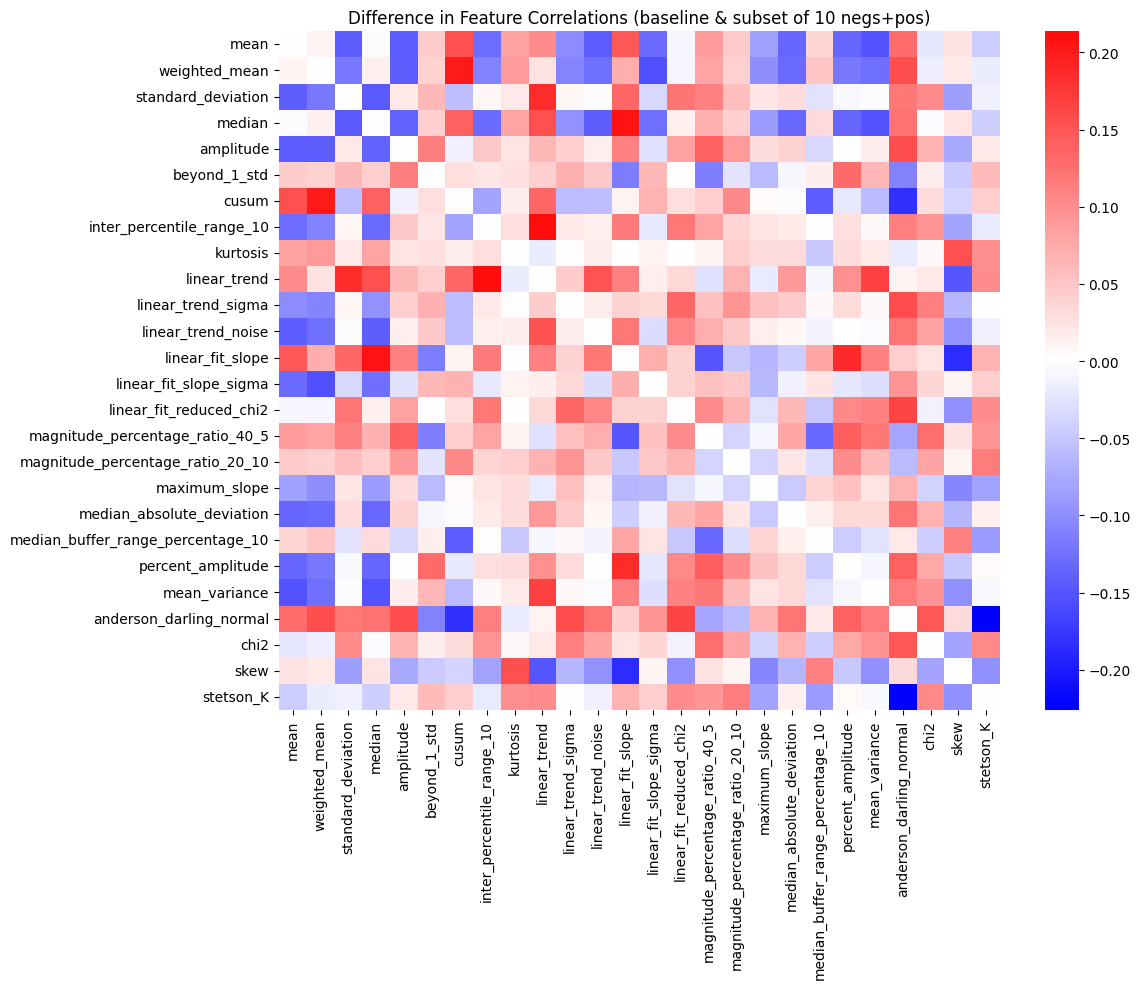

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_1, cmap='bwr', center=0)# vmin=-0.5, vmax=0.5)
plt.title('Difference in Feature Correlations (baseline & subset of 10 negs+pos)')
plt.tight_layout()
plt.show()


In [19]:
sampled_list = []
seen_objects = set()     # To track unique objects across all groups

for f in neg_files:
    df = pd.read_parquet(f)

    # Remove any objects already selected before sampling
    df_unique = df[~df["object"].isin(seen_objects)]

    # Sample up to 10 available unique objects from this group
    n = min(15, len(df_unique))
    sampled = df_unique.sample(n, random_state=42)

    # Add to our list
    sampled_list.append(sampled)

    # Update the set of seen objects
    seen_objects.update(sampled["object"].tolist())

# Combine all 14 groups' samples
final_210 = pd.concat(sampled_list, ignore_index=True)

print(final_210)
print("Total unique sampled objects:", final_210["object"].nunique())

           object       mean  weighted_mean  standard_deviation     median  \
0    ZTF18aaxyuxl  16.354319      16.333272            0.270252  16.427167   
1    ZTF18aaxaoau  15.720052      15.713978            0.163797  15.779869   
2    ZTF18abjwfce  15.530978      15.527124            0.209941  15.516777   
3    ZTF18acvwwcb  15.765434      15.764291            0.085287  15.755574   
4    ZTF18abajgal  15.954566      15.949912            0.133589  15.904966   
..            ...        ...            ...                 ...        ...   
205  ZTF18aazsnoa  17.211081      17.186987            0.188878  17.181168   
206  ZTF18aayejlw  14.109050      14.108431            0.160769  14.164356   
207  ZTF18adkefcr  14.958963      14.948920            0.268326  14.855307   
208  ZTF18aayeikq  14.821923      14.818722            0.189346  14.840870   
209  ZTF18aazsqut  17.846514      16.649353            1.299103  18.244994   

     amplitude  beyond_1_std     cusum  inter_percentile_range_

In [20]:
final_210.to_parquet("negative_combined_210.parquet", index=False)


In [21]:
df_parquet = pd.read_parquet("negative_combined_210.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
# Combine
combined = pd.concat([df_parquet, df_csv], ignore_index=True)
# Shuffle the combined dataset
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)
combined.to_parquet("subset of baseline with 210neg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with 210neg & pos.parquet'")
print("Total rows:", len(combined))


Combined and shuffled dataset saved as 'subset of baseline with 210neg & pos.parquet'
Total rows: 310


In [22]:
df_combined_baseline_subset_15 = pd.read_parquet("subset of baseline with 210neg & pos.parquet")
features_combined_baseline_subset_15 = df_combined_baseline_subset_15 .drop(columns=['object','cluster','cluster_id'])
corr_combined_baseline_subset_15 = features_combined_baseline_subset_15.corr()

In [23]:
corr_diff_2 = (corr_combined_baseline-corr_combined_baseline_subset_15)


In [24]:
corr_diff_clean_2 = corr_diff_2.copy()
corr_diff_clean_2[np.abs(corr_diff_clean_2) < 1e-6] = 0

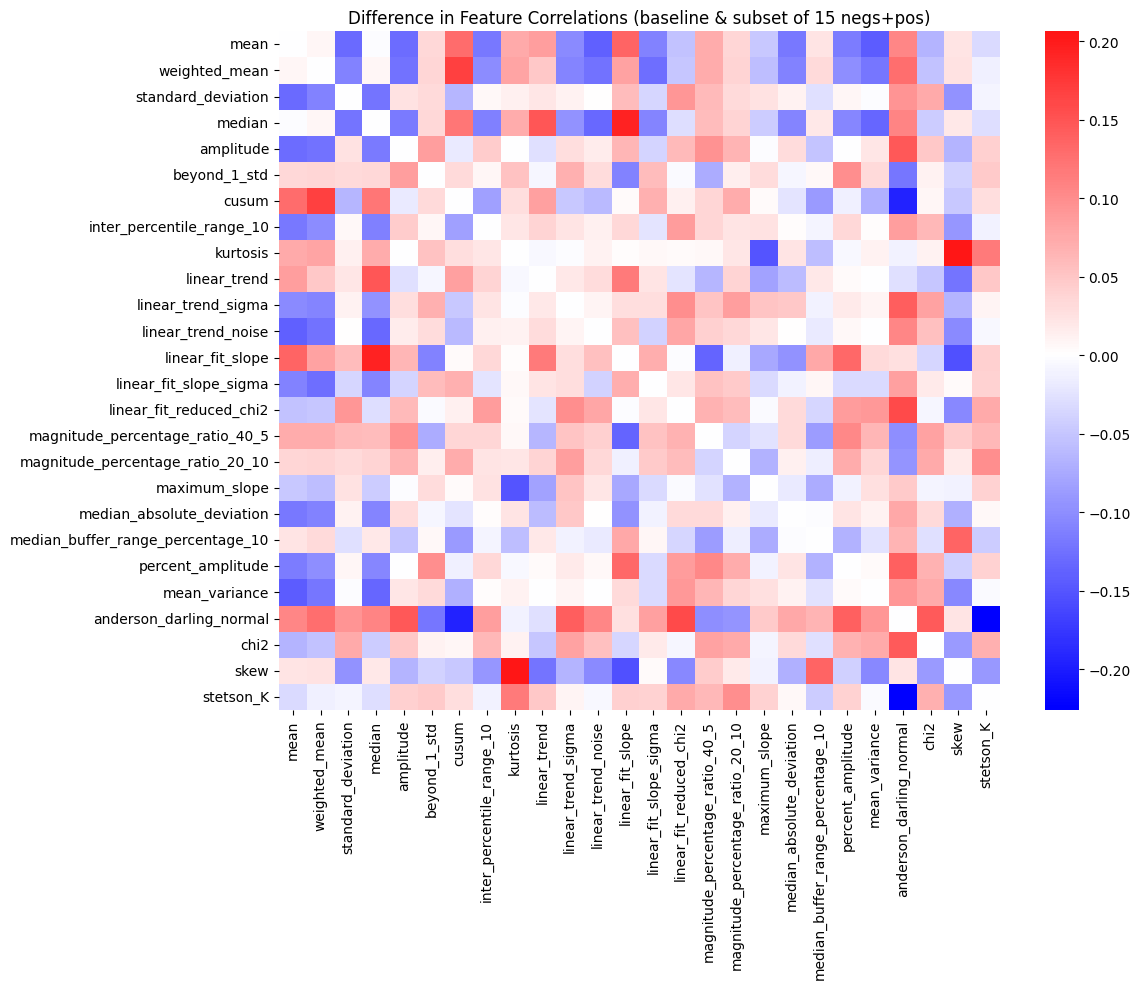

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_2, cmap='bwr', center=0)# vmin=-0.5, vmax=0.5)
plt.title('Difference in Feature Correlations (baseline & subset of 15 negs+pos)')
plt.tight_layout()
plt.show()


In [26]:
df = pd.read_parquet(
    r"D:\Mcvs_clermont\current working directory\cluster_groups\negative_subset_group_4.parquet"
)

In [27]:
df

,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K,cluster,cluster_id
0,ZTF18aaynxzh,16.237496,16.231827,0.144590,16.284330,0.402984,0.340044,0.233749,0.403379,-0.061899,...,0.064301,0.435800,0.512947,0.008905,55.539829,67.672769,-0.696246,0.804291,1,1
1,ZTF18abicdgi,16.442725,16.429339,0.195584,16.417210,0.890525,0.394175,0.284281,0.524807,-0.089143,...,0.119846,0.421359,1.058520,0.011895,22.356629,86.250295,-0.021307,0.791856,1,1
2,ZTF19acysnbi,17.234965,17.228488,0.082571,17.267896,0.726591,0.270136,0.384004,0.185829,10.901178,...,0.047167,0.636307,0.817029,0.004791,49.585956,19.943575,-0.121699,0.833328,1,1
3,ZTF18aayebhl,14.204003,14.201763,0.134159,14.208092,1.292552,0.216512,0.084715,0.290364,37.266624,...,0.060286,0.773647,2.151781,0.009445,37.736898,83.139118,2.255833,0.658148,1,1
4,ZTF18aazsoro,15.988281,15.979478,0.176004,15.988229,0.639895,0.287367,0.258239,0.386182,-0.243500,...,0.151826,0.185053,0.747191,0.011008,17.197578,102.710411,-0.368741,0.849248,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,ZTF18aaywehe,14.309951,14.309551,0.089755,14.328627,0.885984,0.252812,0.363414,0.194676,44.384646,...,0.058720,0.711072,1.448643,0.006272,40.958666,45.313315,2.745431,0.806706,1,1
81,ZTF18aauemkp,13.879226,13.881831,0.272200,13.960079,0.698912,0.287404,0.224204,0.597110,-0.669820,...,0.172158,0.157968,0.830003,0.019612,66.213552,254.924850,-0.441542,0.867660,1,1
82,ZTF20abystxs,16.470364,16.468283,0.067921,16.450893,0.333280,0.437601,0.420865,0.164916,-0.110298,...,0.053774,0.292274,0.457048,0.004124,64.452058,20.014103,0.307191,0.894265,1,1
83,ZTF18aawvgbf,13.882677,13.882438,0.116370,13.877025,0.642362,0.220204,0.156560,0.247003,4.225446,...,0.040938,0.623723,0.878914,0.008382,49.121804,63.664211,0.425381,0.656964,1,1


In [28]:
sampled_list = []
seen_objects = set()     # To track unique objects across all groups

for f in neg_files:
    df = pd.read_parquet(f)

    # Remove any objects already selected before sampling
    df_unique = df[~df["object"].isin(seen_objects)]

    # Sample up to 10 available unique objects from this group
    n = min(30, len(df_unique))
    sampled = df_unique.sample(n, random_state=42)

    # Add to our list
    sampled_list.append(sampled)

    # Update the set of seen objects
    seen_objects.update(sampled["object"].tolist())

# Combine all 14 groups' samples
final_420 = pd.concat(sampled_list, ignore_index=True)

print(final_420)
print("Total unique sampled objects:", final_420["object"].nunique())

           object       mean  weighted_mean  standard_deviation     median  \
0    ZTF18aaxyuxl  16.354319      16.333272            0.270252  16.427167   
1    ZTF18aaxaoau  15.720052      15.713978            0.163797  15.779869   
2    ZTF18abjwfce  15.530978      15.527124            0.209941  15.516777   
3    ZTF18acvwwcb  15.765434      15.764291            0.085287  15.755574   
4    ZTF18abajgal  15.954566      15.949912            0.133589  15.904966   
..            ...        ...            ...                 ...        ...   
415  ZTF18abmdgwj  15.916846      15.913554            0.105689  15.894804   
416  ZTF18abecdnj  16.156951      16.155489            0.070850  16.151783   
417  ZTF18abnxavs  18.150778      18.074738            0.277158  18.250244   
418  ZTF18abebnan  17.312215      17.286001            0.194844  17.326141   
419  ZTF18ablijyg  15.702494      15.701106            0.076603  15.710767   

     amplitude  beyond_1_std     cusum  inter_percentile_range_

In [29]:
final_420.to_parquet("negative_combined_420.parquet", index=False)


In [30]:
df_parquet = pd.read_parquet("negative_combined_420.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)
combined.to_parquet("subset of baseline with 420neg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with 420neg & pos.parquet'")
print("Total rows:", len(combined))


Combined and shuffled dataset saved as 'subset of baseline with 420neg & pos.parquet'
Total rows: 310


In [31]:
df_combined_baseline_subset_30 = pd.read_parquet("subset of baseline with 420neg & pos.parquet")
features_combined_baseline_subset_30 = df_combined_baseline_subset_30 .drop(columns=['object','cluster','cluster_id'])
corr_combined_baseline_subset_30 = features_combined_baseline_subset_30.corr()

In [32]:
corr_diff_3 = (corr_combined_baseline-corr_combined_baseline_subset_30)


In [33]:
corr_diff_clean_3 = corr_diff_3.copy()
corr_diff_clean_3[np.abs(corr_diff_clean_3) < 1e-6] = 0

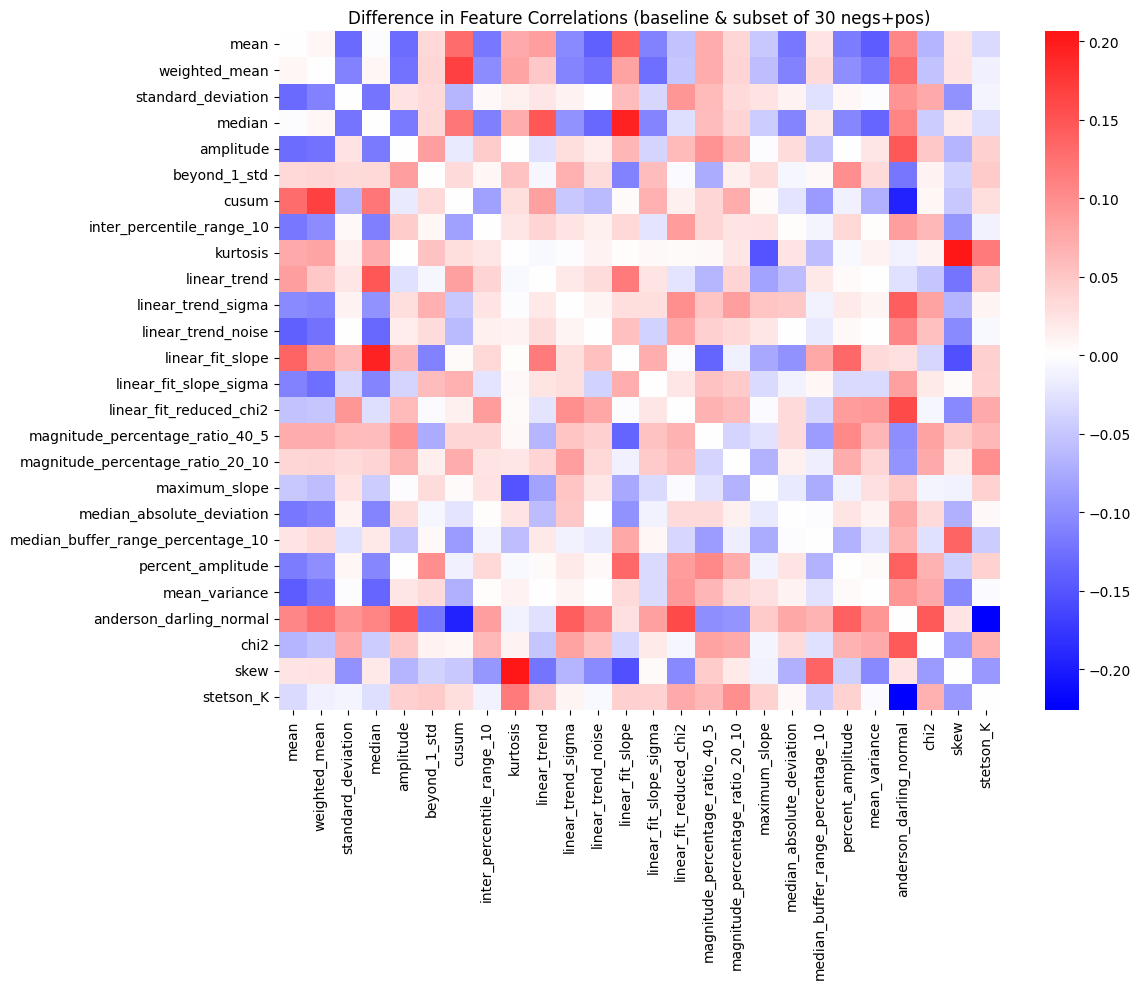

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_clean_3, cmap='bwr', center=0)# vmin=-0.5, vmax=0.5)
plt.title('Difference in Feature Correlations (baseline & subset of 30 negs+pos)')
plt.tight_layout()
plt.show()


In [35]:
sampled_list = []
seen_objects = set()     # To track unique objects across all groups

for f in neg_files:
    df = pd.read_parquet(f)

    # Remove any objects already selected before sampling
    df_unique = df[~df["object"].isin(seen_objects)]

    # Sample up to 10 available unique objects from this group
    n = min(40, len(df_unique))
    sampled = df_unique.sample(n, random_state=42)

    # Add to our list
    sampled_list.append(sampled)

    # Update the set of seen objects
    seen_objects.update(sampled["object"].tolist())

# Combine all 14 groups' samples
final_560 = pd.concat(sampled_list, ignore_index=True)

print(final_560)
print("Total unique sampled objects:", final_560["object"].nunique())

           object       mean  weighted_mean  standard_deviation     median  \
0    ZTF18aaxyuxl  16.354319      16.333272            0.270252  16.427167   
1    ZTF18aaxaoau  15.720052      15.713978            0.163797  15.779869   
2    ZTF18abjwfce  15.530978      15.527124            0.209941  15.516777   
3    ZTF18acvwwcb  15.765434      15.764291            0.085287  15.755574   
4    ZTF18abajgal  15.954566      15.949912            0.133589  15.904966   
..            ...        ...            ...                 ...        ...   
555  ZTF18abacobs  14.583603      14.582026            0.142916  14.565075   
556  ZTF18aawacbp  14.749297      14.747082            0.146717  14.731082   
557  ZTF18abdkteu  17.106799      17.086650            0.176871  17.112183   
558  ZTF18abjfjkj  16.187707      16.175997            0.202759  16.177357   
559  ZTF18aaxddkw  16.815605      16.795682            0.188782  16.795286   

     amplitude  beyond_1_std     cusum  inter_percentile_range_

In [36]:
final_560.to_parquet("negative_combined_560.parquet", index=False)


In [37]:
df_parquet = pd.read_parquet("negative_combined_560.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
# Combine
combined = pd.concat([df_parquet, df_csv], ignore_index=True)
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)
combined.to_parquet("subset of baseline with 560neg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with 560neg & pos.parquet'")
print("Total rows:", len(combined))


Combined and shuffled dataset saved as 'subset of baseline with 560neg & pos.parquet'
Total rows: 660


In [38]:
df_combined_baseline_subset_40 = pd.read_parquet("subset of baseline with 560neg & pos.parquet")
features_combined_baseline_subset_40 = df_combined_baseline_subset_40 .drop(columns=['object','cluster','cluster_id'])
corr_combined_baseline_subset_40 = features_combined_baseline_subset_40.corr()

In [39]:
corr_diff_5 = (corr_combined_baseline-corr_combined_baseline_subset_40)


In [40]:
corr_diff_clean_5 = corr_diff_5.copy()
corr_diff_clean_5[np.abs(corr_diff_clean_5) < 1e-6] = 0

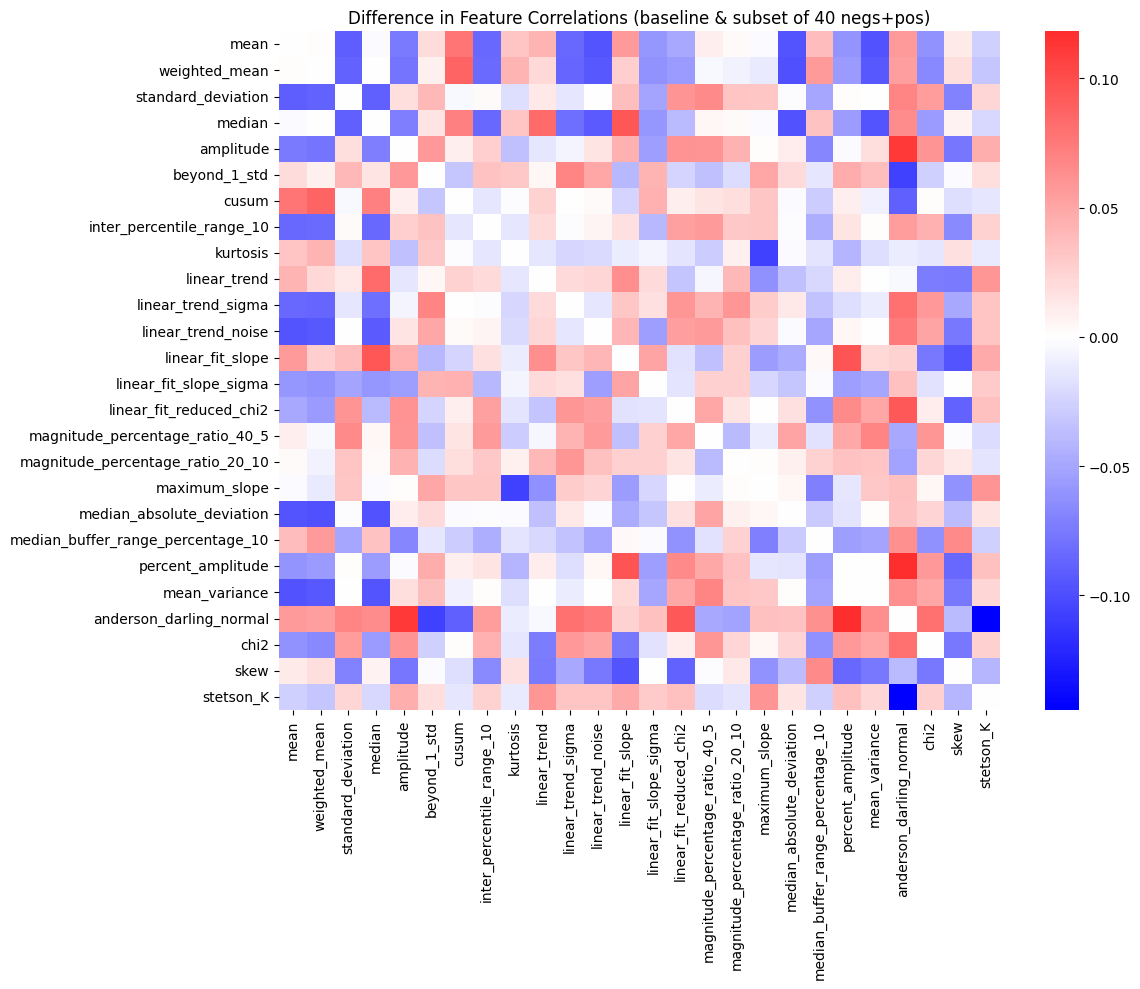

In [41]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_clean_5, cmap='bwr', center=0)# vmin=-0.5, vmax=0.5)
plt.title('Difference in Feature Correlations (baseline & subset of 40 negs+pos)')
plt.tight_layout()
plt.show()


In [42]:
sampled_list = []
seen_objects = set()     # To track unique objects across all groups

for f in neg_files:
    df = pd.read_parquet(f)

    # Remove any objects already selected before sampling
    df_unique = df[~df["object"].isin(seen_objects)]

    # Sample up to 50 available unique objects from this group
    n = min(50, len(df_unique))
    sampled = df_unique.sample(n, random_state=42)

    # Add to our list
    sampled_list.append(sampled)

    # Update the set of seen objects
    seen_objects.update(sampled["object"].tolist())

# Combine all 14 groups' samples
final_700 = pd.concat(sampled_list, ignore_index=True)

print(final_700)
print("Total unique sampled objects:", final_700["object"].nunique())

           object       mean  weighted_mean  standard_deviation     median  \
0    ZTF18aaxyuxl  16.354319      16.333272            0.270252  16.427167   
1    ZTF18aaxaoau  15.720052      15.713978            0.163797  15.779869   
2    ZTF18abjwfce  15.530978      15.527124            0.209941  15.516777   
3    ZTF18acvwwcb  15.765434      15.764291            0.085287  15.755574   
4    ZTF18abajgal  15.954566      15.949912            0.133589  15.904966   
..            ...        ...            ...                 ...        ...   
695  ZTF18aazlsgh  14.882592      14.881386            0.103035  14.883153   
696  ZTF18aayuzaj  13.688346      13.685163            0.358838  13.631022   
697  ZTF18abjskiq  16.131228      16.118649            0.227765  16.130015   
698  ZTF18aawkmkd  15.573213      15.563415            0.205056  15.493747   
699  ZTF18abccppo  14.668199      14.666466            0.107532  14.669506   

     amplitude  beyond_1_std     cusum  inter_percentile_range_

In [43]:
final_700.to_parquet("negative_combined_700.parquet", index=False)


In [44]:
df_parquet = pd.read_parquet("negative_combined_700.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
# Combine
combined = pd.concat([df_parquet, df_csv], ignore_index=True)
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)
combined.to_parquet("subset of baseline with 700neg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with 700neg & pos.parquet'")
print("Total rows:", len(combined))


Combined and shuffled dataset saved as 'subset of baseline with 700neg & pos.parquet'
Total rows: 800


In [45]:
df_combined_baseline_subset_50 = pd.read_parquet("subset of baseline with 700neg & pos.parquet")
features_combined_baseline_subset_50 = df_combined_baseline_subset_50 .drop(columns=['object','cluster','cluster_id'])
corr_combined_baseline_subset_50 = features_combined_baseline_subset_50.corr()

In [46]:
corr_diff_6 = (corr_combined_baseline-corr_combined_baseline_subset_50)


In [47]:
corr_diff_clean_6 = corr_diff_6.copy()
corr_diff_clean_6[np.abs(corr_diff_clean_6) < 1e-3] = 0

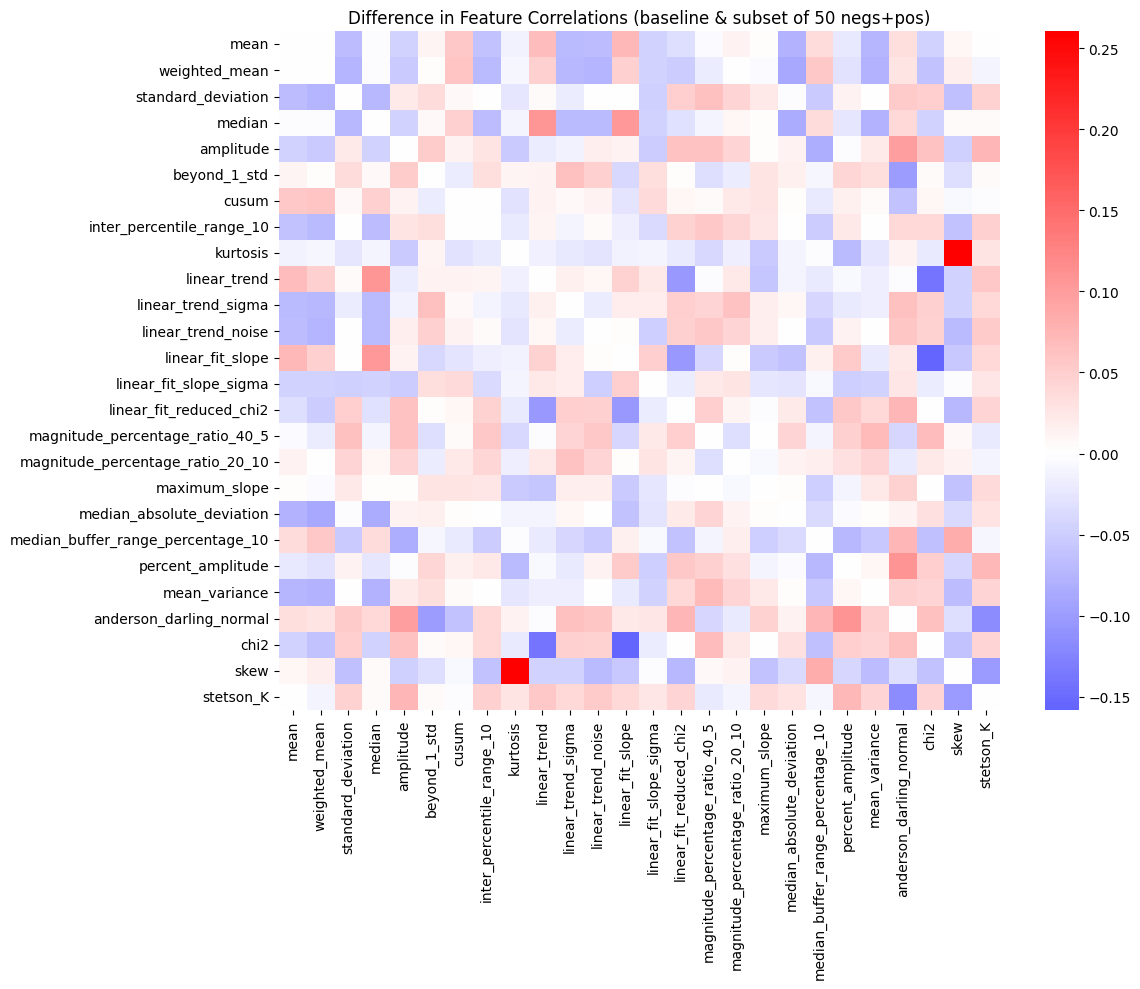

In [48]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_clean_6, cmap='bwr', center=0)# vmin=-0.5, vmax=0.5)
plt.title('Difference in Feature Correlations (baseline & subset of 50 negs+pos)')
plt.tight_layout()
plt.show()


In [49]:
sampled_list = []
seen_objects = set()     # To track unique objects across all groups

for f in neg_files:
    df = pd.read_parquet(f)

    # Remove any objects already selected before sampling
    df_unique = df[~df["object"].isin(seen_objects)]

    # Sample up to 10 available unique objects from this group
    n = min(60, len(df_unique))
    sampled = df_unique.sample(n, random_state=42)

    # Add to our list
    sampled_list.append(sampled)

    # Update the set of seen objects
    seen_objects.update(sampled["object"].tolist())

# Combine all 14 groups' samples
final_840 = pd.concat(sampled_list, ignore_index=True)

print(final_840)
print("Total unique sampled objects:", final_840["object"].nunique())

           object       mean  weighted_mean  standard_deviation     median  \
0    ZTF18aaxyuxl  16.354319      16.333272            0.270252  16.427167   
1    ZTF18aaxaoau  15.720052      15.713978            0.163797  15.779869   
2    ZTF18abjwfce  15.530978      15.527124            0.209941  15.516777   
3    ZTF18acvwwcb  15.765434      15.764291            0.085287  15.755574   
4    ZTF18abajgal  15.954566      15.949912            0.133589  15.904966   
..            ...        ...            ...                 ...        ...   
835  ZTF18aayvgby  16.966766      16.703003            0.753429  16.867558   
836  ZTF18abywasq  16.810864      16.791556            0.197110  16.828175   
837  ZTF18abifwxj  17.740569      17.688934            0.249543  17.702786   
838  ZTF18abseege  17.454712      17.444491            0.116425  17.471063   
839  ZTF18abbtasz  14.430008      14.429211            0.138414  14.424358   

     amplitude  beyond_1_std     cusum  inter_percentile_range_

In [50]:
final_840.to_parquet("negative_combined_840.parquet", index=False)


In [51]:
df_parquet = pd.read_parquet("negative_combined_840.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
# Combine
combined = pd.concat([df_parquet, df_csv], ignore_index=True)
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)
combined.to_parquet("subset of baseline with 840neg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with 840neg & pos.parquet'")
print("Total rows:", len(combined))


Combined and shuffled dataset saved as 'subset of baseline with 840neg & pos.parquet'
Total rows: 940


In [52]:
df_combined_baseline_subset_60 = pd.read_parquet("subset of baseline with 840neg & pos.parquet")
features_combined_baseline_subset_60 = df_combined_baseline_subset_60 .drop(columns=['object','cluster','cluster_id'])
corr_combined_baseline_subset_60 = features_combined_baseline_subset_60.corr()

In [53]:
corr_diff_7 = (corr_combined_baseline-corr_combined_baseline_subset_60)


In [57]:
corr_diff_clean_7 = corr_diff_7.copy()
corr_diff_clean_7[np.abs(corr_diff_clean_7) < 1e-3] = 0

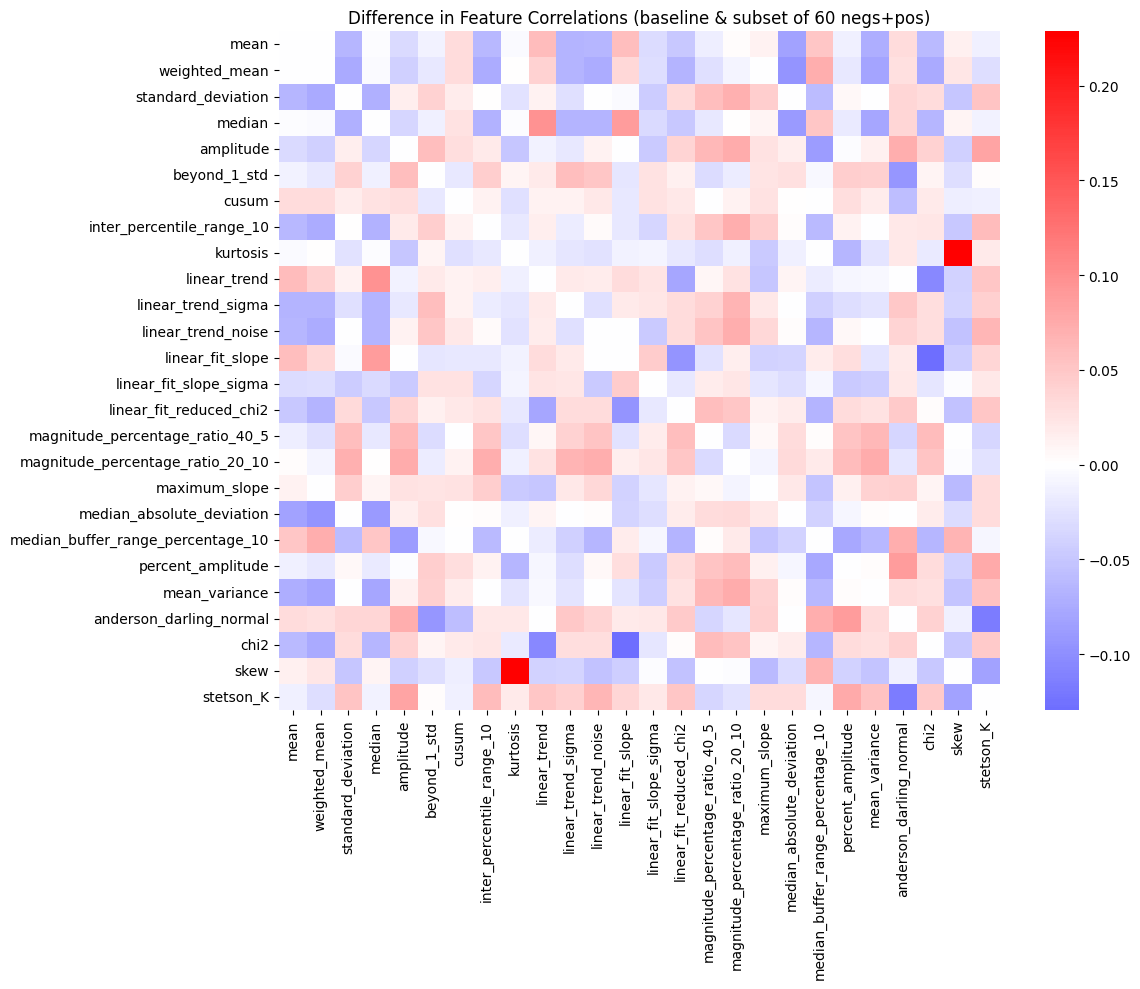

In [58]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_clean_7, cmap='bwr', center=0)# vmin=-0.5, vmax=0.5)
plt.title('Difference in Feature Correlations (baseline & subset of 60 negs+pos)')
plt.tight_layout()
plt.show()


In [60]:
import pandas as pd

neg_files = [
    'negative_subset_group_1.parquet',
    'negative_subset_group_10.parquet',
    'negative_subset_group_11.parquet',
    'negative_subset_group_12.parquet',
    'negative_subset_group_13.parquet',
    'negative_subset_group_14_noise.parquet',
    'negative_subset_group_2.parquet',
    'negative_subset_group_3.parquet',
    'negative_subset_group_4.parquet',
    'negative_subset_group_5.parquet',
    'negative_subset_group_6.parquet',
    'negative_subset_group_7.parquet',
    'negative_subset_group_8.parquet',
    'negative_subset_group_9.parquet'
]

sampled_list = []
seen_objects = set()

# Define fixed and proportional sampling
fixed_n = 50         # for first 13 groups
total_small_group_size = 85
sample_fraction = fixed_n / total_small_group_size   # 50 / 85 ≈ 0.588

for f in neg_files:
    df = pd.read_parquet(f)

    # Remove objects already used
    df_unique = df[~df["object"].isin(seen_objects)]

    if "noise" not in f:
        # First 13 normal groups = sample exactly 50
        n = min(fixed_n, len(df_unique))
    else:
        # Noise group (14th group) = sample proportional count
        proportional_n = int(len(df) * sample_fraction)
        n = min(proportional_n, len(df_unique))

    sampled = df_unique.sample(n, random_state=42)
    sampled_list.append(sampled)

    seen_objects.update(sampled["object"].tolist())

# Combine all sampled data
final_865 = pd.concat(sampled_list, ignore_index=True)

#print(final_sample)
#print("Total unique sampled objects:", final_sample["object"].nunique())


In [61]:
final_865.to_parquet("negative_combined_865.parquet", index=False)


In [62]:
df_parquet = pd.read_parquet("negative_combined_865.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
# Combine
combined = pd.concat([df_parquet, df_csv], ignore_index=True)
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)
combined.to_parquet("subset of baseline with 840neg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with 865neg & pos.parquet'")
print("Total rows:", len(combined))


Combined and shuffled dataset saved as 'subset of baseline with 865neg & pos.parquet'
Total rows: 965


In [63]:
df_combined_baseline_subset_frac_50 = pd.read_parquet("subset of baseline with 840neg & pos.parquet")
features_combined_baseline_subset_frac_50 = df_combined_baseline_subset_frac_50 .drop(columns=['object','cluster','cluster_id'])
corr_combined_baseline_subset_frac_50 = features_combined_baseline_subset_frac_50.corr()

In [64]:
corr_diff_8 = (corr_combined_baseline-corr_combined_baseline_subset_frac_50)


In [65]:
corr_diff_clean_8 = corr_diff_8.copy()
corr_diff_clean_8[np.abs(corr_diff_clean_8) < 1e-3] = 0

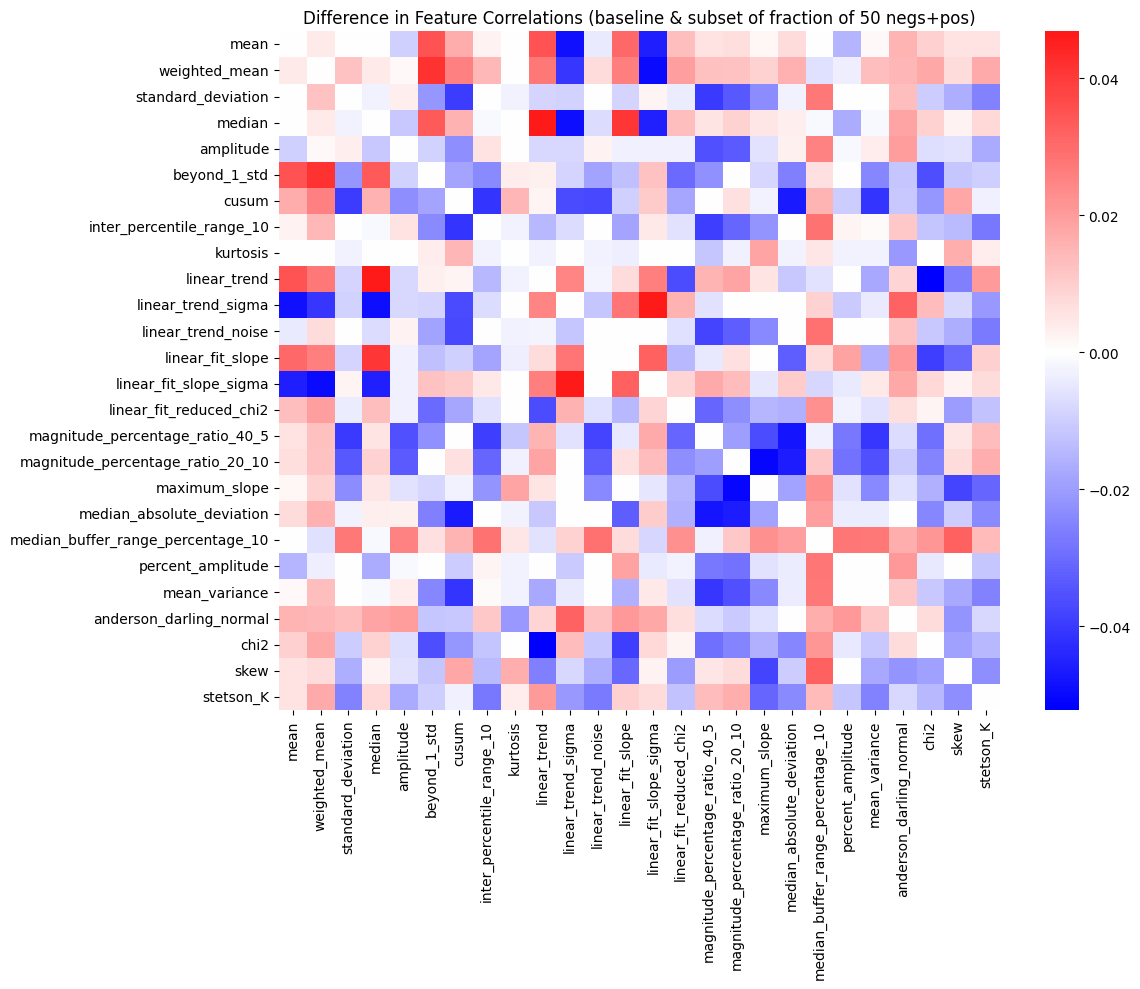

In [66]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_clean_8, cmap='bwr', center=0)#, vmin=-0.5, vmax=0.5)
plt.title('Difference in Feature Correlations (baseline & subset of fraction of 50 negs+pos)')
plt.tight_layout()
plt.show()


In [89]:
import pandas as pd

def sample_unique_from_negative_subsets(file_list, samples_per_group, object_col="object", random_state=42):
    """
    Sample unique objects from multiple groups.

    file_list         : list of parquet file paths
    samples_per_group : how many to draw from EACH group
    object_col        : column name containing object IDs
    random_state      : for reproducibility
    """

    # Set to keep track of already selected unique objects
    seen_objects = set()

    # List to store sampled dataframes
    sampled_list = []

    for f in file_list:
        df = pd.read_parquet(f)

        # Remove objects already used
        df_unique = df[~df[object_col].isin(seen_objects)]

        # How many we can sample from this file
        n = min(samples_per_group, len(df_unique))

        # Skip if no new unique objects available
        if n == 0:
            continue

        # Sample n rows
        sampled = df_unique.sample(n, random_state=random_state)

        # Add to list
        sampled_list.append(sampled)

        # Mark these objects as seen
        seen_objects.update(sampled[object_col].tolist())

    # Combine all sampled dataframes
    final_df = pd.concat(sampled_list, ignore_index=True)
    return final_df


In [97]:
final_10 = sample_unique_from_negative_subsets(file_list = neg_files,samples_per_group = 10) #for fetching 10 elements from each group

print(final_10)
print("Total unique objects:", final_10["object"].nunique())


           object       mean  weighted_mean  standard_deviation     median  \
0    ZTF18aaxyuxl  16.354319      16.333272            0.270252  16.427167   
1    ZTF18aaxaoau  15.720052      15.713978            0.163797  15.779869   
2    ZTF18abjwfce  15.530978      15.527124            0.209941  15.516777   
3    ZTF18acvwwcb  15.765434      15.764291            0.085287  15.755574   
4    ZTF18abajgal  15.954566      15.949912            0.133589  15.904966   
..            ...        ...            ...                 ...        ...   
135  ZTF18abebodx  18.723952      17.634027            1.031779  19.133232   
136  ZTF18aaxaoys  15.540269      15.529291            0.230126  15.479942   
137  ZTF18aayeirb  16.760726      16.732781            0.232782  16.671504   
138  ZTF17aadevea  18.008871      17.786801            0.457134  17.918810   
139  ZTF18aaxddqc  15.413896      15.413070            0.113539  15.406374   

     amplitude  beyond_1_std     cusum  inter_percentile_range_

In [91]:
# Save to parquet
final_10.to_parquet("sampled_negative_10.parquet", index=False)

print("Saved to sampled_negative_10.parquet")

Saved to sampled_negative_10.parquet


In [94]:
df=pd.read_parquet('sampled_negative_10.parquet')

In [95]:
df

,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K,cluster,cluster_id
0,ZTF18aaxyuxl,16.354319,16.333272,0.270252,16.427167,0.839879,0.315376,0.191100,0.798352,0.251133,...,0.083699,0.500000,1.071574,0.016525,70.900849,220.816598,-0.730510,0.780714,1,1
1,ZTF18aaxaoau,15.720052,15.713978,0.163797,15.779869,0.920052,0.318083,0.185798,0.421481,2.162836,...,0.079010,0.526144,1.300966,0.010420,49.873646,102.643327,-0.069234,0.820982,1,1
2,ZTF18abjwfce,15.530978,15.527124,0.209941,15.516777,0.588209,0.348927,0.349168,0.527076,-0.988845,...,0.203831,0.170061,0.689037,0.013518,52.108592,151.882731,-0.317724,0.868797,1,1
3,ZTF18acvwwcb,15.765434,15.764291,0.085287,15.755574,0.627195,0.288340,0.308889,0.231670,8.860717,...,0.038209,0.634693,0.960885,0.005410,24.219243,17.502761,1.110613,0.729606,1,1
4,ZTF18abajgal,15.954566,15.949912,0.133589,15.904966,1.189068,0.187457,0.232452,0.267652,16.219306,...,0.060776,0.698023,1.658087,0.008373,43.704291,52.964607,2.015123,0.777978,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,ZTF18abebodx,18.723952,17.634027,1.031779,19.133232,2.467827,0.302273,0.265333,2.952567,-0.034538,...,0.615642,0.373295,3.427151,0.055105,49.348734,716.928624,-0.773718,0.881124,9,9
136,ZTF18aaxaoys,15.540269,15.529291,0.230126,15.479942,0.858636,0.304992,0.241976,0.496292,-0.002688,...,0.123393,0.224355,1.164082,0.014808,45.493401,209.072062,0.558965,0.834513,1,1
137,ZTF18aayeirb,16.760726,16.732781,0.232782,16.671504,0.501444,0.311263,0.079112,0.627894,-0.759884,...,0.132451,0.163140,0.691777,0.013889,129.480003,141.908582,0.757023,0.856705,1,1
138,ZTF17aadevea,18.008871,17.786801,0.457134,17.918810,1.443067,0.316600,0.293062,1.126524,-0.521255,...,0.316498,0.171851,1.686825,0.025384,54.239802,173.172057,0.434668,0.869042,1,1


In [99]:
final_50 = sample_unique_from_negative_subsets(file_list = neg_files,samples_per_group = 50) #for fetching 50 elements from each group

print(final_50)
print("Total unique objects:", final_50["object"].nunique())


           object       mean  weighted_mean  standard_deviation     median  \
0    ZTF18aaxyuxl  16.354319      16.333272            0.270252  16.427167   
1    ZTF18aaxaoau  15.720052      15.713978            0.163797  15.779869   
2    ZTF18abjwfce  15.530978      15.527124            0.209941  15.516777   
3    ZTF18acvwwcb  15.765434      15.764291            0.085287  15.755574   
4    ZTF18abajgal  15.954566      15.949912            0.133589  15.904966   
..            ...        ...            ...                 ...        ...   
695  ZTF18aazlsgh  14.882592      14.881386            0.103035  14.883153   
696  ZTF18aayuzaj  13.688346      13.685163            0.358838  13.631022   
697  ZTF18abjskiq  16.131228      16.118649            0.227765  16.130015   
698  ZTF18aawkmkd  15.573213      15.563415            0.205056  15.493747   
699  ZTF18abccppo  14.668199      14.666466            0.107532  14.669506   

     amplitude  beyond_1_std     cusum  inter_percentile_range_

In [100]:
# Save to parquet
final_50.to_parquet("sampled_negative_50.parquet", index=False)

print("Saved to sampled_negative_50.parquet")

Saved to sampled_negative_50.parquet


In [101]:
df_parquet = pd.read_parquet("sampled_negative_50.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
# Combine
combined = pd.concat([df_parquet, df_csv], ignore_index=True)
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)
combined.to_parquet("subset of baseline with samples 50neg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with 50neg & pos.parquet'")
print("Total rows:", len(combined))


Combined and shuffled dataset saved as 'subset of baseline with 50neg & pos.parquet'
Total rows: 800


In [103]:
df_combined_baseline_subset_sampled_50 = pd.read_parquet("subset of baseline with samples 50neg & pos.parquet") # dataframe
features_combined_baseline_subset_sampled_50 = df_combined_baseline_subset_sampled_50 .drop(columns=['object','cluster','cluster_id'])# removing nonnumeric columns
corr_combined_baseline_subset_sampled_50 = features_combined_baseline_subset_sampled_50.corr()#converting them into feature correlation matrix

In [104]:
corr_diff_9 = (corr_combined_baseline-corr_combined_baseline_subset_sampled_50) #correlation run


In [112]:
corr_diff_clean_9 = corr_diff_9.copy()
corr_diff_clean_9[np.abs(corr_diff_clean_9) < 1e-3] = 0

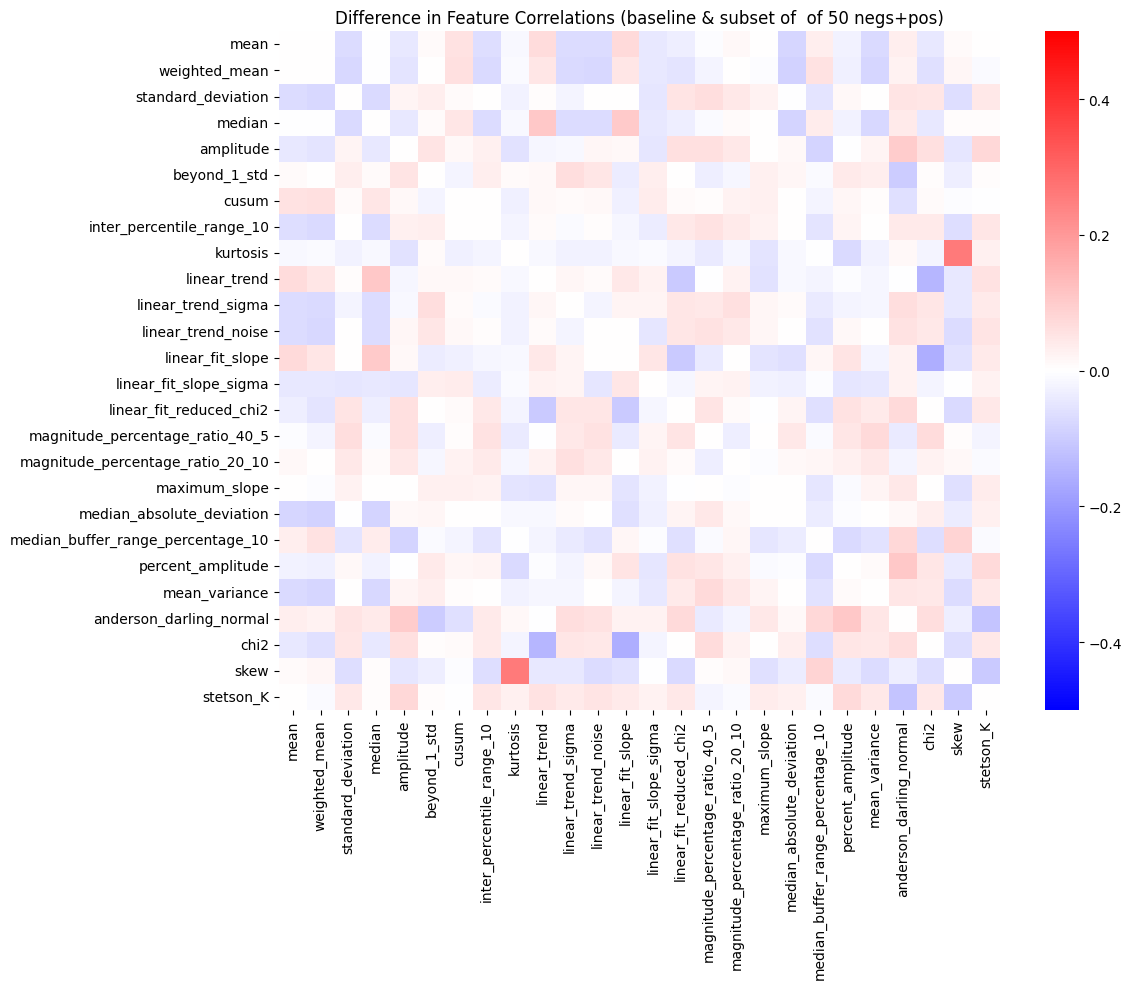

In [114]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_clean_9, cmap='bwr', center=0, vmin=-0.5, vmax=0.5)
plt.title('Difference in Feature Correlations (baseline & subset of  of 50 negs+pos)')
plt.tight_layout()
plt.show()
